<a href="https://colab.research.google.com/github/Dk093/AI/blob/main/Pet_Breed_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Pet Breed Classification of Oxford-IIIT Pet Dataset**

This notebook aims to train a classification model using **fast.ai** to distinguish among images of a different breed of cats and dogs.
We are going to use the **Oxford-IIIT** Pet Dataset by O. M. Parkhi et al., 2012 which features 12 cat breeds and 25 dog breeds. Our model will need to learn to differentiate between these 37 distinct categories.


The lines in the notebook that starts with **‘%’** are called Line Magics.
The **reload_ext autoreload** reloads modules automatically before entering the execution of code typed at the IPython prompt.
The next line **autoreload 2** imports all modules before executing the typed code. The next line is to plot the graphs inside the notebook we use **matplotlib inline**.

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

First we import the necessary libraries from **fast.ai** package.

In [ ]:
from fastai.vision import *
from fastai.metrics import error_rate

If you're using a computer with an unusually small GPU, you may get an out of memory error when running this notebook. If this happens, restart your kernel, uncomment the 2nd line below to use a smaller *batch size*, and try again.

In [ ]:
bs = 64
# bs = 16   # uncomment this line if you run out of memory due to small GPU.

# Loading the Dataset

The first thing we have to do is download and extract the data that we want.

**untar_data** will download the dataset to some path and untar it for us and it will then return the value of the path.

In [ ]:
path = untar_data(URLs.PETS); path

PosixPath('/root/.fastai/data/oxford-iiit-pet')

Then we use **ls()** function which returns the list of file names and directories in the path specified.

In [ ]:
path.ls()

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations')]

We can see that we have two folders, **images** which contains the actual images, and **annotations** which contains the respective labels. And we make separate paths for labels and images.



In [ ]:
path_lbl = path/'annotations'
path_imgs = path/'images'

# Exploratory Data Analysis

Whenever we approach a problem, the first thing is to take a look at the data. We always need to have a clear understanding of what the problem is and what the data looks like before moving further. Taking a look at data can be understood as to how the data directories are structured, what are the labels, and what some sample images look like.

To take a look at the images , we get the file names of the images in **images** folder using **get_image_files()** function of **fastai** library.



In [ ]:
fnames = get_image_files(path_imgs)
fnames[:5]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/japanese_chin_36.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/english_cocker_spaniel_16.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/keeshond_158.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/basset_hound_197.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Bombay_48.jpg')]

We can see that the **labels** of the images are in the filename itself. Hence, we use **regular expression** to extract the labels.

We mention **random.seed(4)** so that we get consistent results everytime this notebook is executed.

In [ ]:
np.random.seed(4)
re_pat = r'/([^/]+)_\d+.jpg$'

For image classification, we make an **ImageDataBunch** and use method **from_name_re** as we need to use a regular expression to get the labels from the file names. **fnames** is the list of files and **re_pat** is the regular expression to extract labels from filename.

We normalize the whole data to have 0 mean and 1 as the standard deviation. In nearly all machine learning tasks, it is recommended to normalize your data to have better results.

In [ ]:
data = ImageDataBunch.from_name_re(path_imgs, fnames, re_pat, ds_tfms=get_transforms(), size=224, bs=bs
                                  ).normalize(imagenet_stats)

Now we can look at the images in our ImageDataBunch by using **data.show_batch()**.

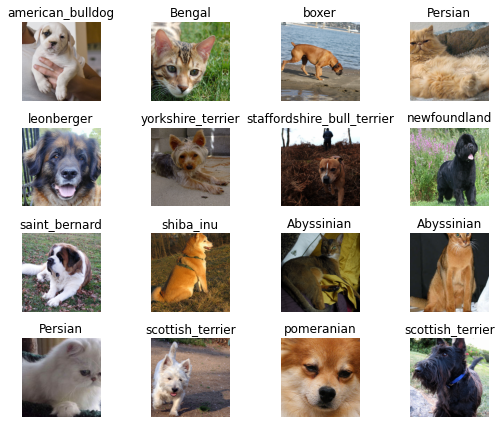

In [ ]:
data.show_batch(rows=4, figsize=(7,6))

We can use **data.classes** to look at distinct classes(labels) present in our data.



In [ ]:
print(data.classes)
len(data.classes)

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


37

So by looking at the data we can see we have the images of Dogs and Cats of 37 different breeds. 

# Training: resnet34

For training the model, we use a **CNN(convolution neural network)** architecture. We train a cnn_learner and use the **resnet34** architecture to apply transfer learning for our model with metrics set as error_rate.
We use the resnet34 model as it is a pre-trained model that already consists of a defined set of weights. resnet34 is already trained on the **ImageNet** dataset which consists of millions of images categorized into thousand categories. It is not certain that those categories will be having our classes as well but we can be confident that the model knows how to classify animals. This greatly decreases the work needed to be done by our learner.

In [ ]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [ ]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

We will use **fit_one_cycle()** function with **epoch** value 2 to train the model. The epoch value indicates the number of passes of the entire training dataset is made to pass through our network while training the model.

In [ ]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate,time
0,1.123192,0.321010,0.100135,29:12
1,0.494029,0.278032,0.085927,29:19


Now we will save our model using **save()** function in case we run out of memory.
And we can use **load()** function to load a model at a specific stage. We can also see the full CNN architecture of our model using  **load()**.

In [ ]:
learn.save('stage-1')

## Results

We can interpret our results by using **ClassificationInterpretation** and pass our learner as the argument. There are many functions available to interpret the classification task at hand like plotting top losses or confusion matrix.

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

We can plot the top losses by using **plot_top_losses()**to see which were the images that were wrongly classified by our learner mostly. 

If we google the images of the prediction and the actual image then we would see that those are not naive classification errors whereas the two breeds have quite a lot in common.

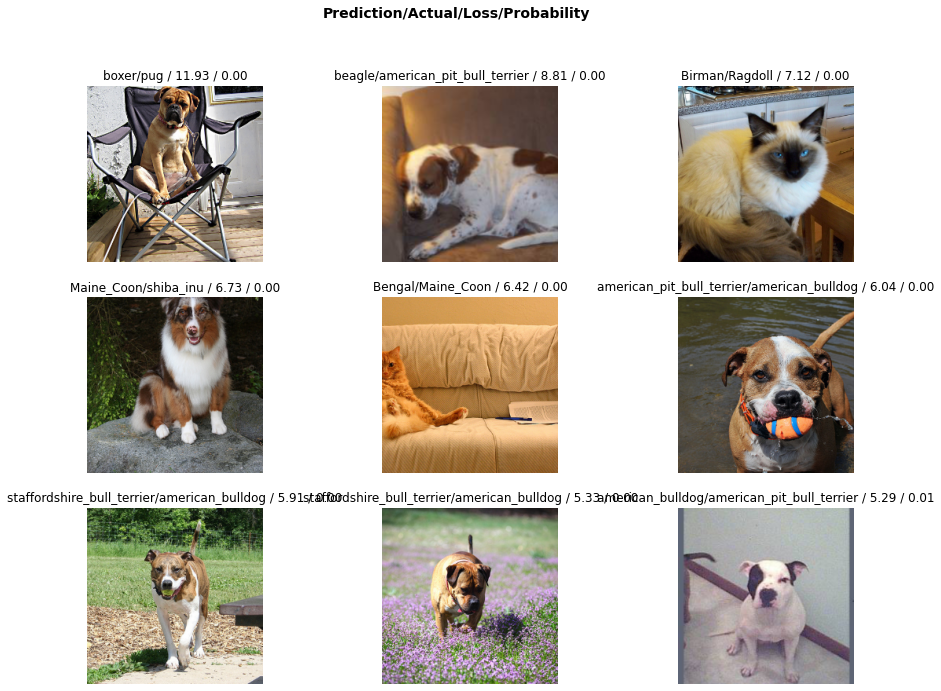

In [ ]:
interp.plot_top_losses(9, figsize=(15,11))

Furthermore , we can plot the confusion matrix by using **plot_confusion_matrix()**.



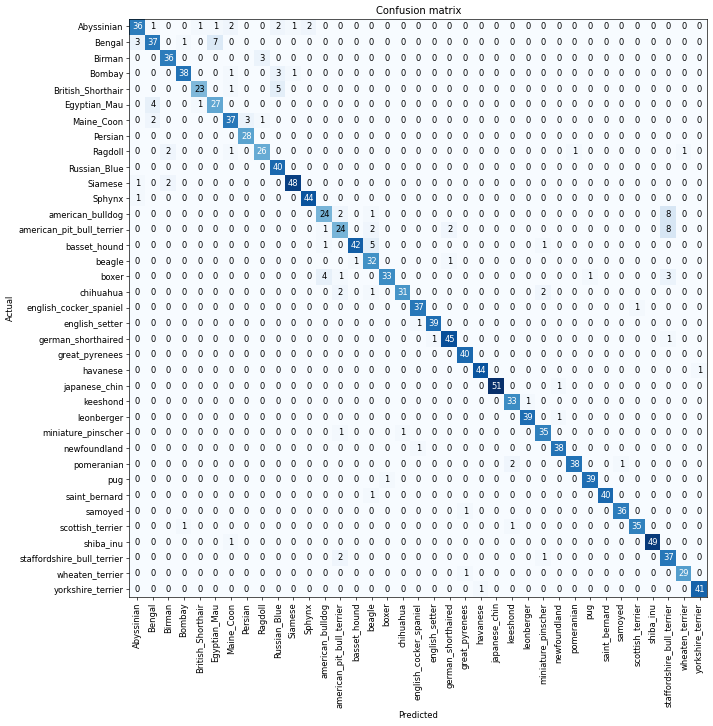

In [ ]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

We can observe that the model makes the same mistakes over and over again but it rarely confuses other categories. This suggests that it just finds it difficult to distinguish some specific categories between each other which can be considered normal behavior.

We can use **most_confused()** to get a sorted descending list of most massive non-diagonal entries of the confusion matrix, presented as actual, predicted, number of occurrences.

In [ ]:
interp.most_confused(min_val=2)

[('american_bulldog', 'staffordshire_bull_terrier', 8),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 8),
 ('Bengal', 'Egyptian_Mau', 7),
 ('British_Shorthair', 'Russian_Blue', 5),
 ('basset_hound', 'beagle', 5),
 ('Egyptian_Mau', 'Bengal', 4),
 ('boxer', 'american_bulldog', 4),
 ('Bengal', 'Abyssinian', 3),
 ('Birman', 'Ragdoll', 3),
 ('Bombay', 'Russian_Blue', 3),
 ('Maine_Coon', 'Persian', 3),
 ('boxer', 'staffordshire_bull_terrier', 3),
 ('Abyssinian', 'Maine_Coon', 2),
 ('Abyssinian', 'Russian_Blue', 2),
 ('Abyssinian', 'Sphynx', 2),
 ('Maine_Coon', 'Bengal', 2),
 ('Ragdoll', 'Birman', 2),
 ('Siamese', 'Birman', 2),
 ('american_bulldog', 'american_pit_bull_terrier', 2),
 ('american_pit_bull_terrier', 'beagle', 2),
 ('american_pit_bull_terrier', 'german_shorthaired', 2),
 ('chihuahua', 'american_pit_bull_terrier', 2),
 ('chihuahua', 'miniature_pinscher', 2),
 ('pomeranian', 'keeshond', 2),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 2)]

We can see above that the learner got confused mostly in distinguishing between British Shorthair and Russian Blue breeds. If we google the images of these two breeds of Cats then we will see these two are quite difficult to distinguish in real life.

#Fine-tuning the Model

We can train all the layers of our learner by using **unfreeze()** so that the pre-trained weights can also be trained according to our dataset. Earlier we were training only the last layer of CNN as the earlier layers were good for recognizing different patterns that we did not want to change or retrain.

In [ ]:
learn.unfreeze()

In [ ]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.679782,0.418675,0.131935,43:16


We can see that the error rate after unfreezing the layers has gone up from 0.08 to 0.13. That is why we need to load the learner that we saved before unfreezing the layers and fine-tune the model with an optimum learning rate.

In [ ]:
learn.load('stage-1');

**Learning rate** is a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving towards a minimum of a loss function.

To fine-tune the model, we need to find an optimum learning rate for training the model. We can find this by using a learning rate finder **lr_find**. It will do a mock training by going over a large range of learning rates, then plot them against the losses. We will pick a value a bit before the minimum, where the loss still improves. Our graph would look something like this:

In [ ]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


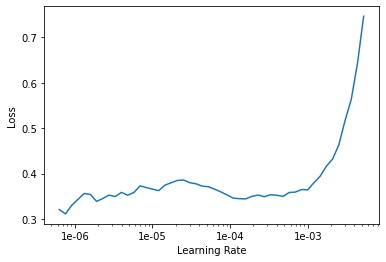

In [ ]:
learn.recorder.plot()

When we are unfreezing the whole model, it tries to fit the initial layers which result in reduced accuracy of the model. Thus, what we want is to have a meager learning rate for the initial layers because we do not want to change the initial weights by considerable amounts and a high learning rate for the latest layers which we want to set up.

That is why we use **slice()** which trains the very first layers at a learning rate of 1e-6, and the very last layers at a rate of 1e-4, and distribute all the other layers across that (i.e. between those two values equally).

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.321329,0.254568,0.075101,44:00
1,0.283974,0.250432,0.076455,42:47


That's a pretty accurate model!

We can train it for more epochs or fine-tune it again with a different learning rate.

# Deployment

For deployment, the following details should be kept in mind:
- On an Nvidia P4 16Gb GPU, it took roughly 30-40 minutes to finish running 1 epoch of training. To achieve 99.9+ accuracy, the model needs to be trained for at least 2 epochs. 
- The only pre-requisite library is **fastai**.